In [109]:
# Install the necessary packages
!pip install gymnasium pyvirtualdisplay > /dev/null 2>&1
!pip install pygame

In [110]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pygame
import itertools

In [111]:
# helper functions

def color(val, max):
    if val > 0:
      return (int(255*(1-val/max)),255,int(255*(1-val/max)))
    elif val == 0:
      return (255,255,255)
    else:
      return (255,int(255*(1+val/max)),int(255*(1+val/max)))

In [159]:
class ParkingLot(gym.Env):

  def __init__(self, lanes, spots_per_lane):

    self.width = lanes * 3 + 1
    self.height = spots_per_lane + 2

    self.observation_space = spaces.Box(low=np.array([0, 0, 0]), high=np.array([self.height-1, self.width-1, 3]), shape=(3,), dtype=np.int32) # {y, x, direction (R,D,L,U)}
    self.action_space = spaces.Discrete(3) # {Go forward, turn right, turn left}

    self.agent_state = np.array([0,0,0])
    self.grid = np.zeros((self.height, self.width))

    for l in range(1, lanes+1):
      self.grid[1:spots_per_lane+1, l*3-2] = 2*l-1
      self.grid[1:spots_per_lane+1, l*3-1] = 2*l

    self.lane_idx = np.array([l*3+1 for l in range(lanes)] + [l*3+2 for l in range(lanes)])
    for s in range(spots_per_lane):
      self.grid[s+1, self.lane_idx] += s

  def __get_obs(self):
    return self.agent_state

  def _render_frame(self, screen, window_width, window_height):
    w = window_width/self.width
    h = window_height/self.height
    for r in range(self.height):
      for c in range(self.width):
        pygame.draw.rect(screen, color(self.grid[r, c], np.max(np.abs(self.grid))), pygame.Rect(c*w, r*h, w, h))
    pygame.draw.polygon(screen, 'blue', self.coordinates(w, h))

  def render(self, screen, window_width, window_height):
    return self._render_frame(screen, window_width, window_height)

  def coordinates(self, w, h):
    if self.agent_state[2] == 0:
      return [
        (self.agent_state[1]*w+w//4, self.agent_state[0]*h+h//4),
        (self.agent_state[1]*w+3*w//4, self.agent_state[0]*h+h//2),
        (self.agent_state[1]*w+w//4, self.agent_state[0]*h+3*h//4)]
    elif self.agent_state[2] == 1:
      return [
        (self.agent_state[1]*w+w//4, self.agent_state[0]*h+h//4),
        (self.agent_state[1]*w+w//2, self.agent_state[0]*h+3*h//4),
        (self.agent_state[1]*w+3*w//4, self.agent_state[0]*h+h//4)]
    elif self.agent_state[2] == 2:
      return [
        (self.agent_state[1]*w+w//4, self.agent_state[0]*h+h//2),
        (self.agent_state[1]*w+3*w//4, self.agent_state[0]*h+h//4),
        (self.agent_state[1]*w+3*w//4, self.agent_state[0]*h+3*h//4)]
    elif self.agent_state[2] == 3:
      return [
        (self.agent_state[1]*w+w//2, self.agent_state[0]*h+h//4),
        (self.agent_state[1]*w+w//4, self.agent_state[0]*h+3*h//4),
        (self.agent_state[1]*w+3*w//4, self.agent_state[0]*h+3*h//4)]


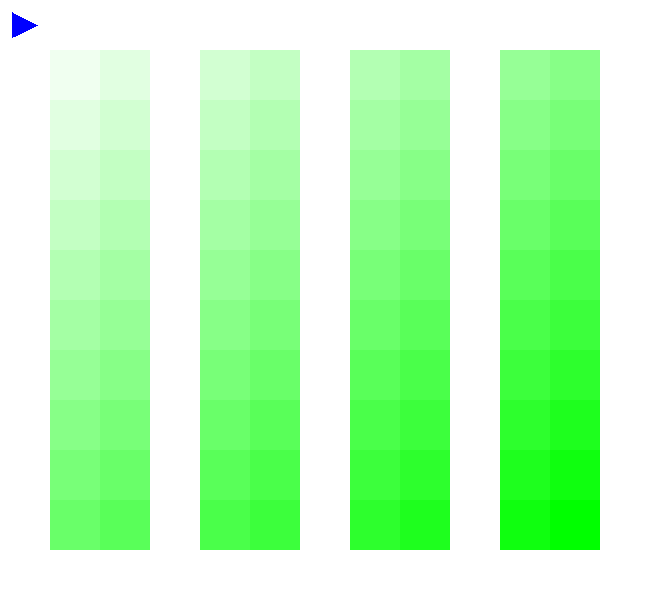

In [160]:
import cv2
from IPython.display import clear_output
from google.colab.patches import cv2_imshow
import time

lot = ParkingLot(4, 10)
grid_L = 50
window_width = lot.width * grid_L
window_height = lot.height * grid_L
pygame.init()
screen = pygame.display.set_mode((window_width, window_height))
lot.render(screen, window_width, window_height)
view = pygame.surfarray.array3d(screen)
view = view.transpose([1, 0, 2])
img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
cv2_imshow(img_bgr)